In [14]:
#%matplotlib osx
%matplotlib inline

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Interactive plotting with Pyplot's global state

In [16]:
x = pd.period_range(pd.datetime.now(), periods=200, freq='d')
x = x.to_timestamp().to_pydatetime()
y = np.random.randn(200, 3).cumsum(0)

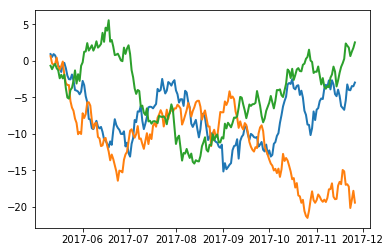

In [17]:
plt.plot(x, y)

## Configuring Matplotlib

In [18]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r' # red

In [19]:
# set figure size to 8 by 4 inches
plt.rcParams['figure.figsize'] = (8,4)
plt.gcf().set_size_inches(8, 4)

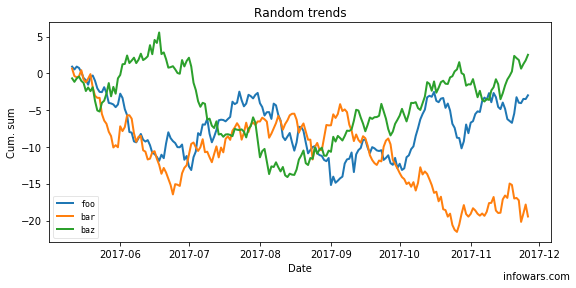

In [26]:
plots = plt.plot(x, y)
plt.legend(plots, ('foo', 'bar', 'baz'), loc='best', framealpha=0.5, prop={'size': 'small', 'family': 'monospace'})
plt.title('Random trends')
plt.xlabel('Date')
plt.ylabel('Cum. sum')

plt.figtext(0.995, 0.01, 'infowars.com', ha='right', va='bottom')
plt.tight_layout()
plt.savefig('mpl_3lines_custom.svg')

# Figures and object-oriented Matplotlib

In [25]:
fig = plt.figure(figsize=(8, 4), dpi=200, tight_layout=True, linewidth=1, edgecolor='r')

## Axes and subplots

[]

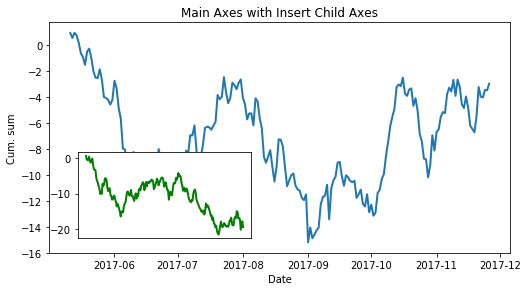

In [27]:
fig = plt.figure(figsize=(8,4))
# --- Main axes
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_title('Main Axes with Insert Child Axes')
ax.plot(x, y[:, 0])
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')
# --- Inserted axes
ax = fig.add_axes([0.15, 0.15, 0.3, 0.3])
ax.plot(x, y[:, 1], color='g')
ax.set_xticks([])

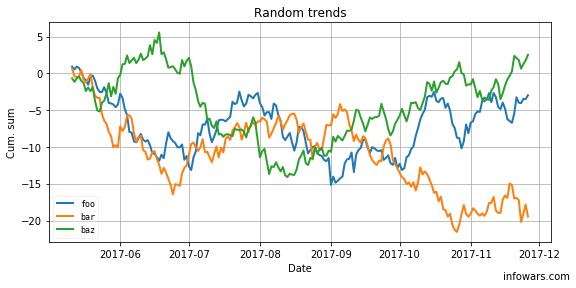

In [28]:
figure, ax = plt.subplots()
plots = ax.plot(x, y, label='')
figure.set_size_inches(8, 4)
ax.legend(plots, ('foo', 'bar', 'baz'), loc='best', framealpha=0.25, prop={'size': 'small', 'family': 'monospace'})
ax.set_title('Random trends')
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')
ax.grid(True)
figure.text(0.995, 0.01, 'infowars.com', ha='right', va='bottom')
figure.tight_layout()

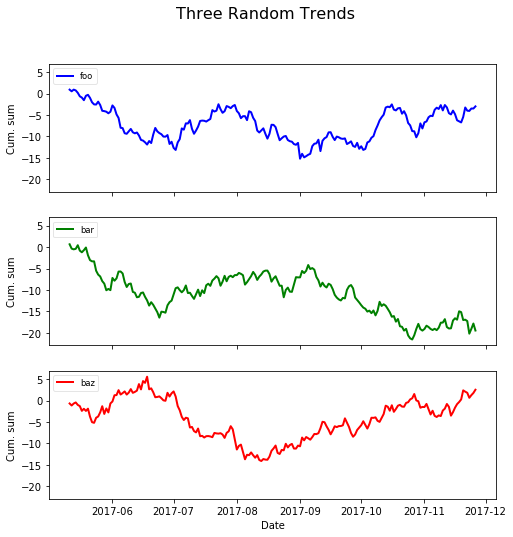

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 8))
labelled_data = zip(y.transpose(), ('foo', 'bar', 'baz'), ('b', 'g', 'r'))
fig.suptitle('Three Random Trends', fontsize=16)
for i, ld in enumerate(labelled_data):
    ax = axes[i]
    ax.plot(x, ld[0], label=ld[1], color=ld[2])
    ax.set_ylabel('Cum. sum')
    ax.legend(loc='upper left', framealpha=0.5, prop={'size': 'small'})
    axes[-1].set_xlabel('Date')

# Plot types

## Bar plots

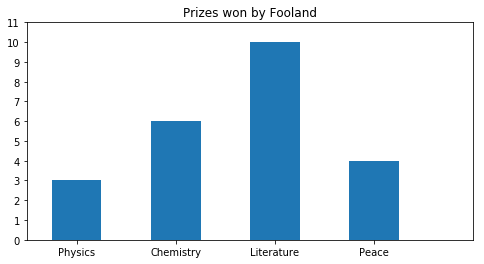

In [35]:
labels = ['Physics', 'Chemistry', 'Literature', 'Peace']
foo_data = [3, 6, 10, 4]

bar_width = 0.5
xlocations = np.array(range(len(foo_data))) + bar_width
plt.bar(xlocations, foo_data, width=bar_width)
plt.yticks(range(0, 12))
plt.xticks(xlocations, labels)
plt.xlim(0, xlocations[-1]+bar_width*2)
plt.title('Prizes won by Fooland')
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.gcf().set_size_inches((8, 4))

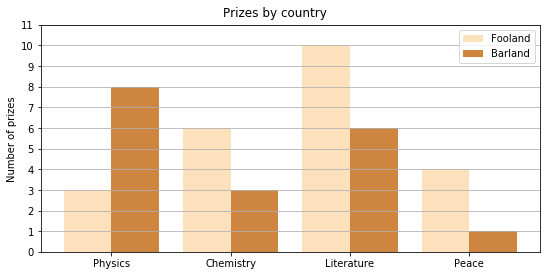

In [44]:
labels = ['Physics', 'Chemistry', 'Literature', 'Peace']
foo_data = [3, 6, 10, 4]
bar_data = [8, 3, 6, 1]

fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.4
xlocs = np.arange(len(foo_data))
ax.bar(xlocs-bar_width, foo_data, bar_width, color='#fde0bc', label='Fooland')
ax.bar(xlocs, bar_data, bar_width, color='peru', label='Barland')
#--- ticks, labels, grids, and title
ax.set_yticks(range(12))
ax.set_xticks(xlocs-bar_width/2)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Number of prizes')

fig.suptitle('Prizes by country')
fig.tight_layout(pad=2)
fig.savefig('mpl_barchart_multi.png', dpi=200)

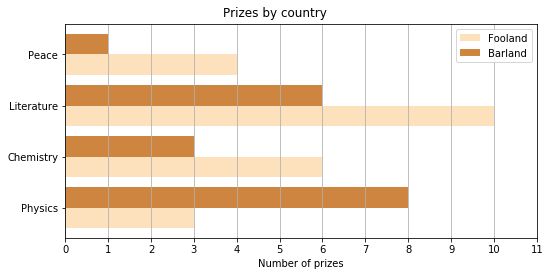

In [45]:
fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.4
ylocs = np.arange(len(foo_data))
ax.barh(ylocs-bar_width, foo_data, bar_width, color='#fde0bc', label='Fooland')
ax.barh(ylocs, bar_data, bar_width, color='peru', label='Barland')
#--- ticks, labels, grids, and title
ax.set_xticks(range(12))
ax.set_yticks(ylocs-bar_width/2)
ax.set_yticklabels(labels)
ax.xaxis.grid(True)
ax.legend(loc='best')
ax.set_xlabel('Number of prizes')

fig.suptitle('Prizes by country')
fig.tight_layout(pad=2)
fig.savefig('mpl_barhchart_multi.png', dpi=200)

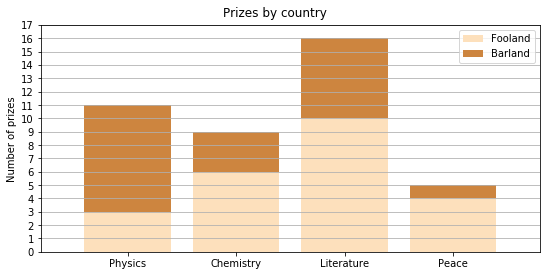

In [50]:
fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.8
xlocs = np.arange(len(foo_data))
ax.bar(xlocs, foo_data, bar_width, color='#fde0bc', label='Fooland')
ax.bar(xlocs, bar_data, bar_width, color='peru', label='Barland', bottom=foo_data)
#--- ticks, labels, grids, and title
ax.set_yticks(range(18))
ax.set_xticks(ticks=np.array(range(len(foo_data))))
ax.set_xticklabels(labels)
ax.set_xlim(-bar_width, xlocs[-1]+bar_width)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Number of prizes')

fig.suptitle('Prizes by country')
fig.tight_layout(pad=2)
fig.savefig('mpl_barchart_multi_stack.png', dpi=200)

## Scatter plots

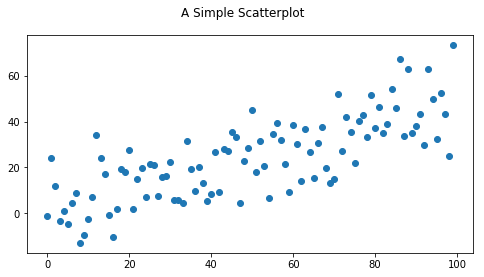

In [51]:
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y)

fig.suptitle('A Simple Scatterplot')

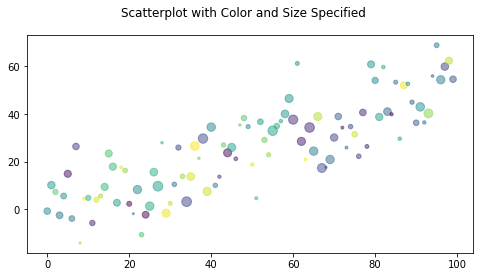

In [52]:
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8, 4))

colors = np.random.rand(num_points)
size = (2 + np.random.rand(num_points) * 8) ** 2

ax.scatter(x, y, s=size, c=colors, alpha=0.5)

fig.suptitle('Scatterplot with Color and Size Specified')

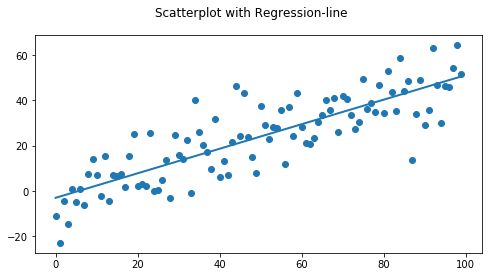

In [53]:
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y)

m, c = np.polyfit(x, y, 1)
ax.plot(x, m*x + c)

fig.suptitle('Scatterplot with Regression-line')

# Seaborn

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns # relies on matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

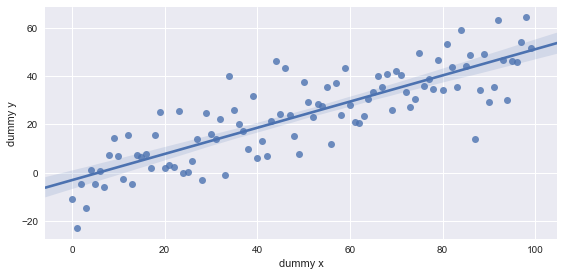

In [55]:
data = pd.DataFrame({'dummy x': x, 'dummy y': y})

sns.lmplot('dummy x', 'dummy y', data, size=4, aspect=2)
plt.tight_layout()
plt.savefig('mpl_scatter_seaborn.png')

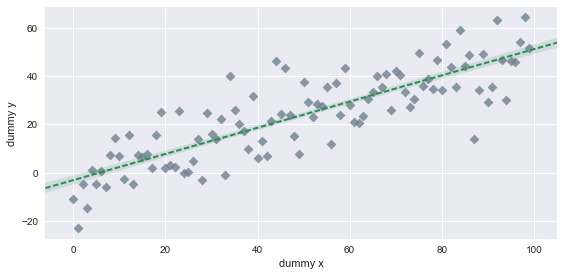

In [63]:
sns.lmplot('dummy x', 'dummy y', data, size=4, aspect=2,\
          scatter_kws={'color': 'slategray'},\
          line_kws={'linewidth': 2, 'linestyle': '--', 'color': 'seagreen'},\
          markers='D', ci=68)

## FacetGrids

In [67]:
tips = sns.load_dataset('tips')
from IPython.display import display
display(tips)

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female     No   Sun  Dinner     3
17        16.29  3.71    Male     No   Sun  Dinner     3
18        16.97  3.50  Female     No   Sun  Dinner     3
19        20.65  3.35    Male     No   Sat  Dinner     3
20        17.92  4.08    Male     No   Sat  Dinner     2
21        20.29  2.75  Female     No   Sat  Dinner     2
22        15.77  2.23  Female     No   Sat  Dinner     2
23        39.42  7.58    Male     No   Sat  Dinner     4
24        19.82  3.18    Male     No   Sat  Dinner     2
25        17.81  2.34    Male     No   Sat  Dinner     4
26        13.37  2.00    Male     No   Sat  Dinner     2
27        12.69  2.00    Male     No   Sat  Dinner     2
28        21.70  4.30    Male     No   Sat  Dinner     2
29        19.65  3.00  Female     No   Sat  Dinner     2
..          ...   ...     ...    ...   ...     ...   ...
214       28.17  6.50  Female    Yes   Sat  Dinner     3
215       12.90  1.10  Female    Yes   Sat  Dinner     2
216       28.15  3.00    Male    Yes   Sat  Dinner     5
217       11.59  1.50    Male    Yes   Sat  Dinner     2
218        7.74  1.44    Male    Yes   Sat  Dinner     2
219       30.14  3.09  Female    Yes   Sat  Dinner     4
220       12.16  2.20    Male    Yes   Fri   Lunch     2
221       13.42  3.48  Female    Yes   Fri   Lunch     2
222        8.58  1.92    Male    Yes   Fri   Lunch     1
223       15.98  3.00  Female     No   Fri   Lunch     3
224       13.42  1.58    Male    Yes   Fri   Lunch     2
225       16.27  2.50  Female    Yes   Fri   Lunch     2
226       10.09  2.00  Female    Yes   Fri   Lunch     2
227       20.45  3.00    Male     No   Sat  Dinner     4
228       13.28  2.72    Male     No   Sat  Dinner     2
229       22.12  2.88  Female    Yes   Sat  Dinner     2
230       24.01  2.00    Male    Yes   Sat  Dinner     4
231       15.69  3.00    Male    Yes   Sat  Dinner     3
232       11.61  3.39    Male     No   Sat  Dinner     2
233       10.77  1.47    Male     No   Sat  Dinner     2
234       15.53  3.00    Male    Yes   Sat  Dinner     2
235       10.07  1.25    Male     No   Sat  Dinner     2
236       12.60  1.00    Male    Yes   Sat  Dinner     2
237       32.83  1.17    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

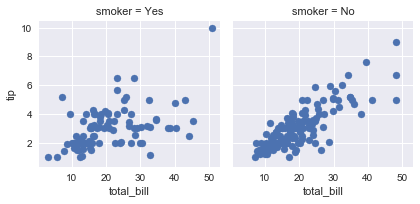

In [69]:
g = sns.FacetGrid(tips, col='smoker')
g.map(plt.scatter, 'total_bill', 'tip')

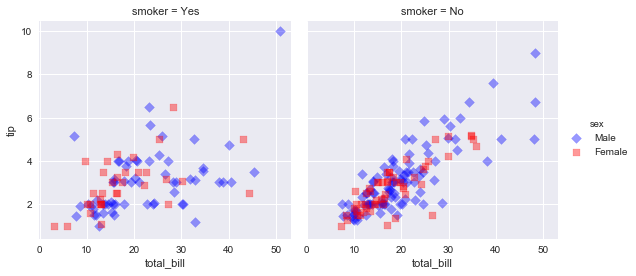

In [72]:
pal = dict(Female='red', Male='blue')
g = sns.FacetGrid(tips, col='smoker', hue='sex', hue_kws={'marker': ['D', 's']}, palette=pal, size=4, aspect=1,)
g.map(plt.scatter, 'total_bill', 'tip', alpha=.4)
g.add_legend()

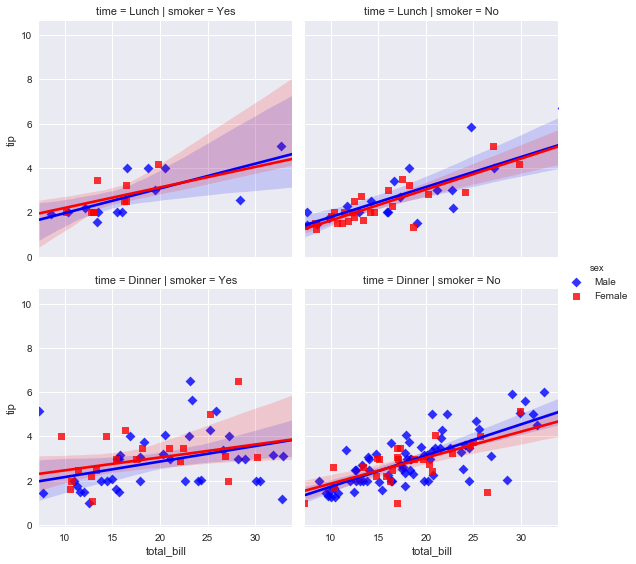

In [75]:
pal = dict(Female='red', Male='blue')
g = sns.FacetGrid(tips, col='smoker', row='time', hue='sex', hue_kws={'marker': ['D', 's']}, palette=pal, size=4, aspect=1)
g.map(sns.regplot, 'total_bill', 'tip')
g.add_legend()

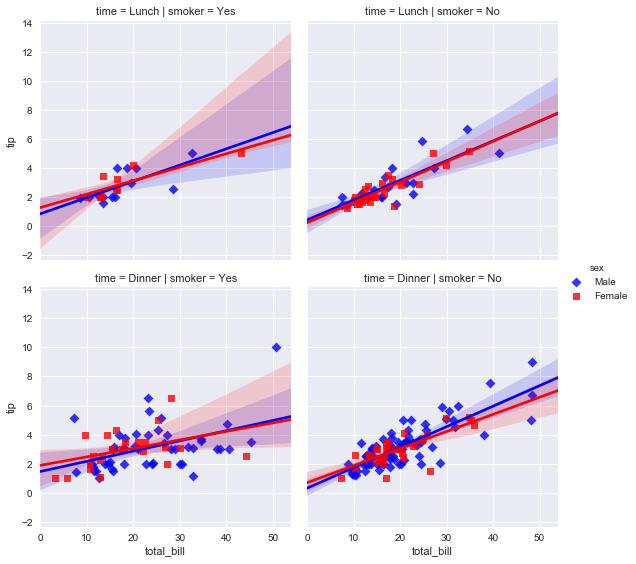

In [76]:
pal = dict(Female='red', Male='blue')
sns.lmplot(x='total_bill', y='tip', hue='sex', markers=['D', 's'], col='smoker', row='time', data=tips, palette=pal, size=4, aspect=1)

## Pairgrids

In [77]:
iris = sns.load_dataset('iris')
display(iris)

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0           1.1          0.1     setosa
14            5.8          4.0           1.2          0.2     setosa
15            5.7          4.4           1.5          0.4     setosa
16            5.4          3.9           1.3          0.4     setosa
17            5.1          3.5           1.4          0.3     setosa
18            5.7          3.8           1.7          0.3     setosa
19            5.1          3.8           1.5          0.3     setosa
20            5.4          3.4           1.7          0.2     setosa
21            5.1          3.7           1.5          0.4     setosa
22            4.6          3.6           1.0          0.2     setosa
23            5.1          3.3           1.7          0.5     setosa
24            4.8          3.4           1.9          0.2     setosa
25            5.0          3.0           1.6          0.2     setosa
26            5.0          3.4           1.6          0.4     setosa
27            5.2          3.5           1.5          0.2     setosa
28            5.2          3.4           1.4          0.2     setosa
29            4.7          3.2           1.6          0.2     setosa
..            ...          ...           ...          ...        ...
120           6.9          3.2           5.7          2.3  virginica
121           5.6          2.8           4.9          2.0  virginica
122           7.7          2.8           6.7          2.0  virginica
123           6.3          2.7           4.9          1.8  virginica
124           6.7          3.3           5.7          2.1  virginica
125           7.2          3.2           6.0          1.8  virginica
126           6.2          2.8           4.8          1.8  virginica
127           6.1          3.0           4.9          1.8  virginica
128           6.4          2.8           5.6          2.1  virginica
129           7.2          3.0           5.8          1.6  virginica
130           7.4          2.8           6.1          1.9  virginica
131           7.9          3.8           6.4          2.0  virginica
132           6.4          2.8           5.6          2.2  virginica
133           6.3          2.8           5.1          1.5  virginica
134           6.1          2.6           5.6          1.4  virginica
135           7.7          3.0           6.1          2.3  virginica
136           6.3          3.4           5.6          2.4  virginica
137           6.4          3.1           5.5          1.8  virginica
138           6.0          3.0           4.8          1.8  virginica
139           6.9          3.1           5.4          2.1  virginica
140           6.7          3.1           5.6          2.4  virginica
141           6.9          3.1           5.1          2.3  virginica
142           5.8          2.7           5.1          1.9  virginica
143           6.8          3.2           5.9          2.3  virginica
144           6.7          3.3           5.7          2.5  virginica
145           6.7          3.0           5.2          2.3  virginica
146

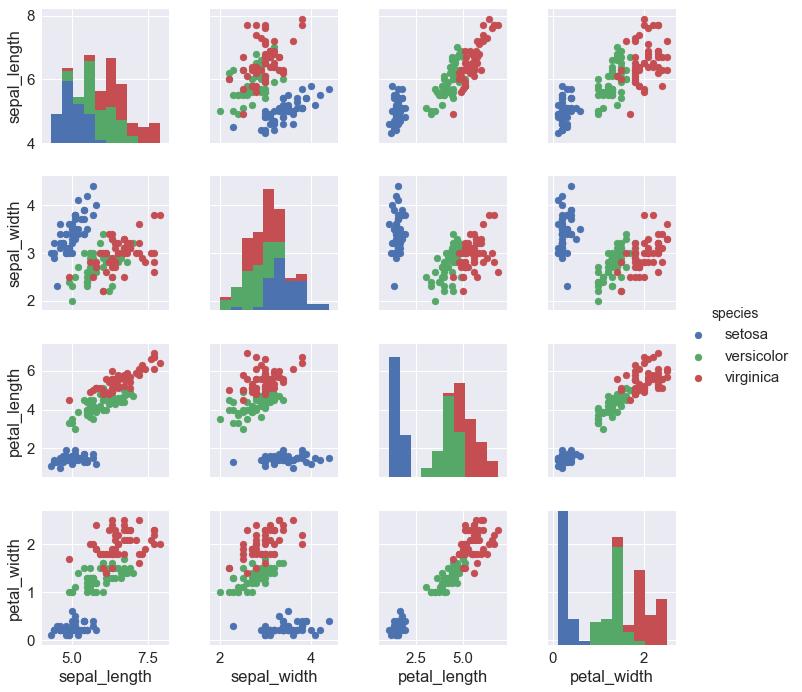

In [78]:
sns.set(font_scale=1.5)
g = sns.PairGrid(iris, hue='species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()